# Tutorial week 10 - Deep Learning and Convolutional Neural Networks (CNNs)

<font color='red'>**SOLUTIONS**: Please note that if you run the code, some solutions may change.</font>

#### Run the provided code and answer the questions.

#### Note: Perform the steps described in 6COSC020W_TutorialWeek8.pdf (Week 8) if you have issues with TensorFlow.
#### 1) Download the Cifar10 dataset. This tutorial uses the test set as a validation set. Ideally we would have another independent set to test the final accuracy.

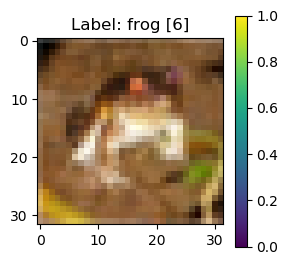

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pathlib
import PIL
import seaborn as sns

seed = 123 # to ensure we always get the same results
np.random.seed(seed) # to ensure we always get the same results
tf.keras.utils.set_random_seed(seed) # to ensure we always get the same results

(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

train_labels = np.array(train_labels).transpose()[0] # convert from a column to row
test_labels = np.array(test_labels).transpose()[0] # convert from a column to row

#normalisation
train_images, test_images = train_images / 255.0, test_images / 255.0 # all values between 0 and 1 to improve performance

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(3, 3))
plt.imshow(train_images[0])
plt.title(("Label: " + str(class_names[train_labels[0]])) + " [" + str(train_labels[0]) +"]")
plt.colorbar()
plt.grid(False)
plt.show()


#### 2) Images in the training and validation sets:

In [2]:
print('Number of images in training: ' + str(len(train_images)))
print('Number of images in testing: ' + str(len(test_images)))


Number of images in training: 50000
Number of images in testing: 10000


#### 3) Images for each class in the training set:

In [3]:
for i in range(len(class_names)):
    print(class_names[i] + ': ' + str(np.count_nonzero(train_labels == i)))


airplane: 5000
automobile: 5000
bird: 5000
cat: 5000
deer: 5000
dog: 5000
frog: 5000
horse: 5000
ship: 5000
truck: 5000


#### **Question 1: Know your data. Is it a balanced or imbalanced dataset?**

<font color='red'>**SOLUTION**: It is a balanced dataset because all classes have the same number of images (5,000).</font>

#### 4) Display some images from the training dataset
Images provided have a small resolution to make the training faster.

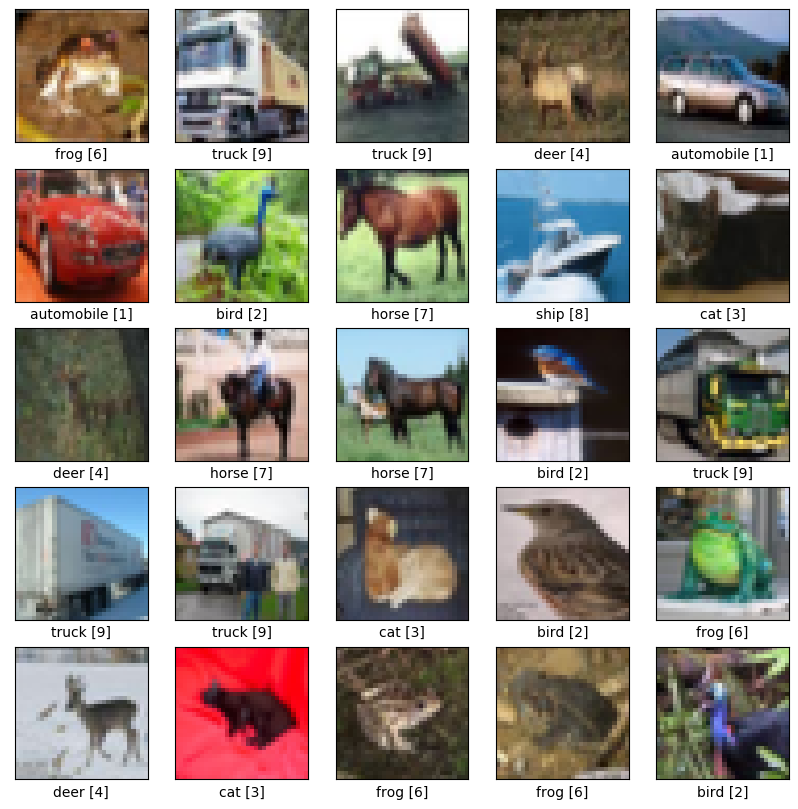

In [4]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(str(class_names[train_labels[i]]) + " [" + str(train_labels[i]) +"]")
    
plt.show()

#### 5) We create a simple neural network with 3 convolutional layers, with max pooling and average pooling, and 1 dense layer:

In [5]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)), # Convolutional layer 3x3 with a ReLu activation
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2), # Max pooling 2x2
    tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'), # Convolutional layer 3x3 with a ReLu activation
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2), # Max pooling 2x2
    tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'), # Convolutional layer 3x3 with a ReLu activation
    tf.keras.layers.AveragePooling2D(pool_size=(2,2), strides=2), # Average pooling 2x2
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10) # number of outputs = 10 (10 classess)
])

#### 6) We compile the model. We use Adam optimiser, and a loss function SparseCategoricalCrossentropy (because it is a classification task):

In [6]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          18496     
                                                                 
 average_pooling2d (AverageP  (None, 2, 2, 64)         0

#### **Question 2: How many trainable parameters has the first convolutional layer?**

<font color='red'>**SOLUTION**:  448.</font>

#### **Question 3: How many trainable parameters have the pooling layers? Why?**

<font color='red'>**SOLUTION**: 0, because they do not have weights/parameters to train. They only perform a mathematical operation. </font>

#### 7) Train the model

In [7]:
epochs = 15
history = model.fit(train_images, train_labels, validation_data=[test_images, test_labels], epochs=epochs)

Epoch 1/15
1563/1563 [==============================] - 15s 9ms/step - loss: 1.5932 - accuracy: 0.4260 - val_loss: 1.3507 - val_accuracy: 0.5143
Epoch 2/15
1563/1563 [==============================] - 16s 11ms/step - loss: 1.2847 - accuracy: 0.5449 - val_loss: 1.2982 - val_accuracy: 0.5348
Epoch 3/15
1563/1563 [==============================] - 16s 10ms/step - loss: 1.1728 - accuracy: 0.5880 - val_loss: 1.1507 - val_accuracy: 0.5850
Epoch 4/15
1563/1563 [==============================] - 15s 10ms/step - loss: 1.0983 - accuracy: 0.6163 - val_loss: 1.1337 - val_accuracy: 0.6055
Epoch 5/15
1563/1563 [==============================] - 18s 11ms/step - loss: 1.0386 - accuracy: 0.6404 - val_loss: 1.0827 - val_accuracy: 0.6184
Epoch 6/15
1563/1563 [==============================] - 17s 11ms/step - loss: 0.9923 - accuracy: 0.6555 - val_loss: 1.0010 - val_accuracy: 0.6508
Epoch 7/15
1563/1563 [==============================] - 16s 11ms/step - loss: 0.9484 - accuracy: 0.6720 - val_loss: 0.9832 - 

#### 8) Evaluate the model

In [8]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.8618 - accuracy: 0.7067 - 1s/epoch - 4ms/step

Test accuracy: 0.7067000269889832


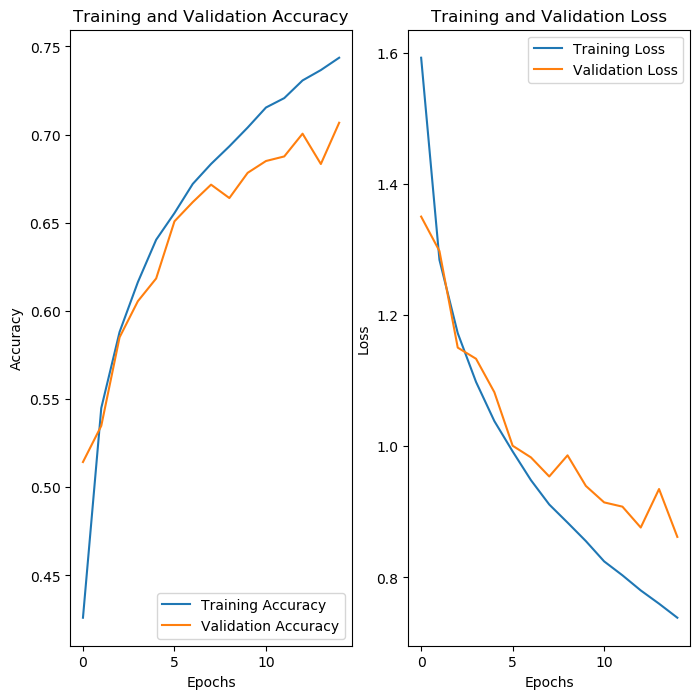

In [9]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

#### 9) Get probabilities. For each test image will tell us the probability to belong to each of the 10 classes (i.e., for each test image will output an array of 10 values).
Since our model returns the logits, we add a Softmax layer in order to convert logits to probabilities.

In [10]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])
probabilities = probability_model.predict(test_images)
print('Size of variable probabilities: ' + str(probabilities.shape)) # You can see the size of the arrays here (10000, 10)
print('Probabilities:')
print(probabilities) # Returns an array of 10000 arrays with 10 probabilities each (one for each class)

313/313 [==============================] - 1s 4ms/step
Size of variable probabilities: (10000, 10)
Probabilities:
[[1.23616681e-03 1.51840490e-04 1.22544374e-02 ... 6.04594999e-04
  4.07767249e-03 1.01857749e-03]
 [9.15119145e-03 7.84125477e-02 1.30929948e-06 ... 4.70639009e-07
  9.09274101e-01 3.15732975e-03]
 [1.98911414e-01 3.13267469e-01 6.22091908e-03 ... 2.34395708e-03
  3.20498914e-01 1.26254484e-01]
 ...
 [1.32354635e-05 1.28662748e-06 2.97022518e-03 ... 1.88919120e-02
  2.23288180e-06 6.58475301e-06]
 [1.08703978e-01 8.22929665e-02 9.07330029e-03 ... 5.09329699e-02
  8.69411742e-04 1.59032848e-02]
 [2.42730698e-06 1.24139224e-05 2.82622292e-04 ... 9.88438189e-01
  1.29536588e-07 4.74253920e-06]]


#### 10) Get predicted class
For each image, we have a vector of 10 probabilities (1 for each possible class) that tells us the probability that that image belongs to the class. We now want to get the class with the highest probability. We use argmax to get the class with the highest probability

In [11]:
predictions = np.argmax(probabilities, axis = 1) # gets the maximum probability of each image (maximum value)

print('Size of variable predictions: ' + str(predictions.shape)) # We now have one value (class) for each image.
print('Predictions:')
print(predictions)
print('Labels:')
print(test_labels)

Size of variable predictions: (10000,)
Predictions:
[3 8 8 ... 5 4 7]
Labels:
[3 8 8 ... 5 1 7]


#### 11) Show the confusion matrix
The confusion matrix is a matrix that shows for each class (labels) how many images where predicted in the correct or wrong class. The diagonal of the matrix shows the classes that where predicted correctly, the rest are errors. They are useful to know the classes in which the network gets 'confused'. Label is the original (true) label, so the correct class. Prediction is the predicted class by the network (which may be correct or incorrect).

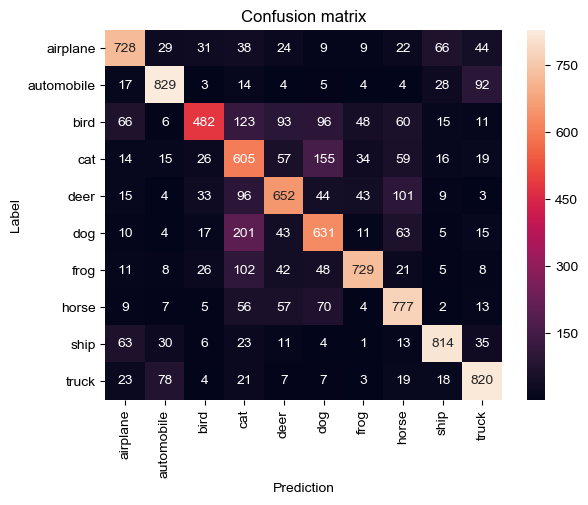

In [12]:
def plot_confusion_matrix(actual, predicted, labels):
  cm = tf.math.confusion_matrix(actual, predicted)
  ax = sns.heatmap(cm, annot=True, fmt='g')
  sns.set(rc={'figure.figsize':(7, 7)})
  ax.set_title('Confusion matrix')
  ax.set_xlabel('Prediction')
  ax.set_ylabel('Label')
  plt.xticks(rotation=90)
  plt.yticks(rotation=0) 
  ax.xaxis.set_ticklabels(labels)
  ax.yaxis.set_ticklabels(labels)

plot_confusion_matrix(test_labels, predictions, class_names)

#### **Question 4: How many images of airplanes where predicted correctly?**

<font color='red'>**SOLUTION**: 728, see intersection where label = 'airplane' and prediction = 'ariplane'.</font>

#### **Question 5: How many images of cats where predicted as frogs?**

<font color='red'>**SOLUTION**: 34, see intersection where label = 'cat' and prediction = 'frog'.</font>

#### **Question 6: Which are the 2 classes with the highest number of wrong predictions? i.e., the class that gets 'confused' most. Why do you think is that?**

<font color='red'>**SOLUTION**: Cats and dogs. 201 dogs where predicted as cats and 155 cats where predicted as dogs. This is probably because the images have similar patterns.</font>